In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
def autolabel(ax, rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')    
        
sns.set(style="darkgrid")

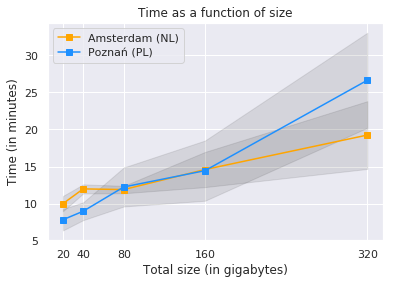

In [10]:
std = pd.DataFrame({
    'Amsterdam (NL)': [1.03, 0.61, 0.50, 2.37, 4.57],
    'Poznań (PL)': [1.44, 1.20, 2.63, 4.06, 6.41],
})

df = pd.DataFrame({
    'Amsterdam (NL)': [9.99, 11.98, 11.89, 14.59, 19.24],
    'Poznań (PL)': [7.82, 8.97, 12.24, 14.44, 26.63],
    'x': [20, 40, 80, 160, 320],
})
 
plt.plot('x', 'Amsterdam (NL)', data=df, marker='s', color='orange')
plt.fill_between(df['x'], df['Amsterdam (NL)'] - std['Amsterdam (NL)'], df['Amsterdam (NL)'] + std['Amsterdam (NL)'], color='k', alpha=.1)

plt.plot('x', 'Poznań (PL)', data=df, marker='s', color='dodgerblue')
plt.fill_between(df['x'], df['Poznań (PL)'] - std['Poznań (PL)'], df['Poznań (PL)'] + std['Poznań (PL)'], color='k', alpha=.1)

plt.xlabel('Total size (in gigabytes)')
plt.ylabel('Time (in minutes)')

plt.xticks(df['x'])

plt.title('Time as a function of size')
plt.legend(loc='upper left')
plt.savefig('time-size-func.png')
plt.show()

In [11]:
def autolabel_mins(ax, rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        seconds = round(height * 60)
        m, s = divmod(seconds, 60)
        h, m = divmod(m, 60)
        
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height, "%02d:%02d" % (m, s), ha=ha[xpos], va='bottom')   

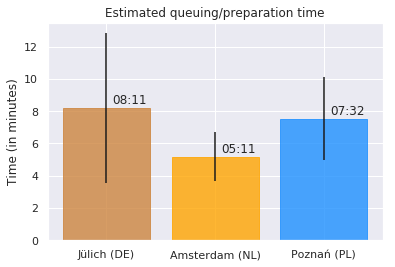

In [12]:
objects = ('Jülich (DE)', 'Amsterdam (NL)', 'Poznań (PL)')
y_pos = np.arange(len(objects))
time = [8.19,5.19,7.53]
std = [4.64, 1.53, 2.56]

bars = plt.bar(y_pos, time, align='center', yerr=std, alpha=0.8)
bars[0].set_color('peru')
bars[1].set_color('orange')
bars[2].set_color('dodgerblue')

autolabel_mins(plt, bars, 'right')

plt.xticks(y_pos, objects)
plt.ylabel('Time (in minutes)')
plt.title('Estimated queuing/preparation time')

plt.savefig('queing-time.png')
plt.show()

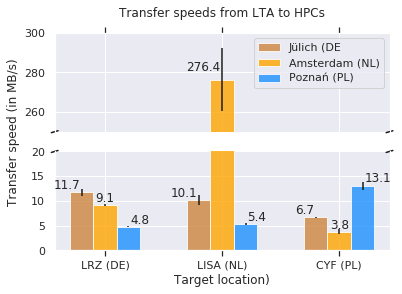

In [30]:
de_means, de_std = (11.7, 10.1, 6.7), (0.7, 1, 0.1)
nl_means, nl_std = (9.1, 276.4, 3.8), (0.2, 15.8, 0.5)
pl_means, pl_std = (4.8, 5.4, 13.1), (0.1, 0.2, 0.8)

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ind = np.arange(len(nl_means))  # the x locations for the groups
width = 0.4  # the width of the bars

rects1 = ax.bar(ind - width/2, de_means, width/2, yerr=de_std,
                color='peru', label='Jülich (DE', alpha=0.8)

rects1 = ax2.bar(ind - width/2, de_means, width/2, yerr=de_std,
                color='peru', label='Jülich (DE)', alpha=0.8)

rects2 = ax.bar(ind, nl_means, width /2, yerr=nl_std,
                color='orange', label='Amsterdam (NL)', alpha=0.8)

rects2 = ax2.bar(ind, nl_means, width /2, yerr=nl_std,
                color='orange', label='Amsterdam (NL)', alpha=0.8)

rects3 = ax.bar(ind + width/2, pl_means, width /2, yerr=pl_std,
                color='dodgerblue', label='Poznań (PL)', alpha=0.8)

rects3 = ax2.bar(ind + width/2, pl_means, width /2, yerr=pl_std,
                color='dodgerblue', label='Poznań (PL)', alpha=0.8)


# zoom-in / limit the view to different portions of the data
ax.set_ylim(250, 300)  # outliers only
ax2.set_ylim(0, 20)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Transfer speed (in MB/s)', y=0)
ax2.set_xlabel('Target location)')
ax.set_xticks(ind)
ax.set_xticklabels(('LRZ (DE)', 'LISA (NL)', 'CYF (PL)'))
ax.legend()

autolabel(ax2, rects1, "left")
autolabel(ax2, rects2[:1], "center")
autolabel(ax, rects2[1:2], "left")
autolabel(ax2, rects2[2:], "center")
autolabel(ax2, rects3, "right")

d = .01
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.title('Transfer speeds from LTA to HPCs', y=2.3)
plt.savefig('transfer-speeds.png')
plt.show()